In [20]:
## Airlines Exercise - H Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
Airlines = pd.read_csv("EastWestAirlines.csv")
Airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [2]:
# Column rename.

Airlines= Airlines.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [3]:
Airlines

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 12 columns]

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(Airlines.iloc[:,1:])
df_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       1.0  
...     ...  
3994    1.0  
3995    1.0  
3996    1.0  
3997    0.0  
3998    0.0  

[3999 rows x 11 columns]

In [6]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(Airlines.iloc[:,1:]))
data 

0    1     2    3    4         5         6         7         8   \
0     0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1     0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2     0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3     0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4     0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   
...        ...  ...   ...  ...  ...       ...       ...       ...       ...   
3994  0.010837  0.0  0.00  0.0  0.0  0.032330  0.046512  0.006490  0.018868   
3995  0.037766  0.0  0.00  0.0  0.0  0.003720  0.058140  0.000000  0.000000   
3996  0.043169  0.0  0.50  0.0  0.0  0.096505  0.093023  0.000000  0.000000   
3997  0.032202  0.0  0.00  0.0  0.0  0.001896  0.011628  0.016225  0.018868   
3998  0.001769  0.0  0.00  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

            9    10  
0     0.843742  0.0  
1     0.839884  0.0  
2     0.847842  0.0  
3     0.837955  0.0  
4     0.835905  1.0  
...        ...  ...  
3994  0.168917  1.0  
3995  0.167953  1.0  
3996  0.168797  1.0  
3997  0.168676  0.0  
3998  0.168314  0.0  

[3999 rows x 11 columns]

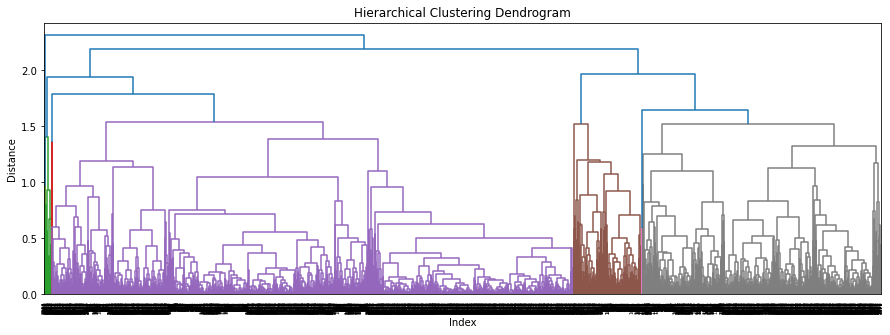

In [28]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Airlines['clust']=cluster_labels # creating a  new column and assigning it to new column 
Airlines

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  clust  
0         0      3  
1         0      3  
2         0      3  
3         0      3  
4         1      0  
...     ...    ...  
3994      1      0  
3995      1      0  
3996      1      0  
3997      0      3  
3998      0      3  

[3999 rows x 13 columns]

In [73]:
Airlines.iloc[:,1:].groupby(Airlines.clust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                               
0       97168.431787  241.630969   2.663029   1.007503   1.002046   
1       73501.777778    0.000000   3.555556   1.000000   4.444444   
2      223573.500000  250.000000   1.000000   1.000000   1.000000   
3       59961.123244   88.551987   1.712967   1.000401   1.006022   
4       45515.064516   32.258065   1.000000   2.483871   1.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clust                                                                   
0       28425.358117    15.592769         827.952933         2.517735   
1      111665.777778    26.333333         277.777778         0.777778   
2       49057.500000    72.000000       21845.000000        53.000000   
3       10170.362505     9.095143         227.239663         0.653553   
4       14618.870968    16.129032         443.225806         1.967742   

       Days_since_enroll     Award  clust  
clust                                      
0            4626.933834  1.000000      0  
1            4299.222222  0.777778      1  
2            1822.500000  1.000000      2  
3            3824.722601  0.000000      3  
4            3784.258065  0.193548      4

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Airlines_subset = pd.DataFrame(scaler.fit_transform(Airlines.iloc[:,1:]))
Airlines_subset 

0         1         2         3         4         5         6   \
0    -0.451141 -0.186299 -0.769578 -0.098242 -0.062767 -0.702786 -1.104065   
1    -0.539457 -0.186299 -0.769578 -0.098242 -0.062767 -0.701088 -0.999926   
2    -0.320031 -0.186299 -0.769578 -0.098242 -0.062767 -0.539253 -0.791649   
3    -0.583799 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
4     0.239678 -0.186299  1.409471 -0.098242 -0.062767  1.083121  1.499394   
...        ...       ...       ...       ...       ...       ...       ...   
3994 -0.547079 -0.186299 -0.769578 -0.098242 -0.062767 -0.356960 -0.791649   
3995 -0.091465 -0.186299 -0.769578 -0.098242 -0.062767 -0.669367 -0.687511   
3996 -0.000043 -0.186299  0.683121 -0.098242 -0.062767  0.343804 -0.375096   
3997 -0.185607 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
3998 -0.700508 -0.186299 -0.769578 -0.098242 -0.062767 -0.709992 -1.208203   

            7         8         9         10        11  
0    -0.328603 -0.362168  1.395454 -0.766919  0.754665  
1    -0.328603 -0.362168  1.379957 -0.766919  0.754665  
2    -0.328603 -0.362168  1.411920 -0.766919  0.754665  
3    -0.328603 -0.362168  1.372208 -0.766919  0.754665  
4     1.154932  0.692490  1.363975  1.303918 -1.309096  
...        ...       ...       ...       ...       ...  
3994 -0.185750 -0.098503 -1.315120  1.303918 -1.309096  
3995 -0.328603 -0.362168 -1.318994  1.303918 -1.309096  
3996 -0.328603 -0.362168 -1.315604  1.303918 -1.309096  
3997  0.028531 -0.098503 -1.316088 -0.766919  0.754665  
3998 -0.328603 -0.362168 -1.317541 -0.766919  0.754665  

[3999 rows x 12 columns]

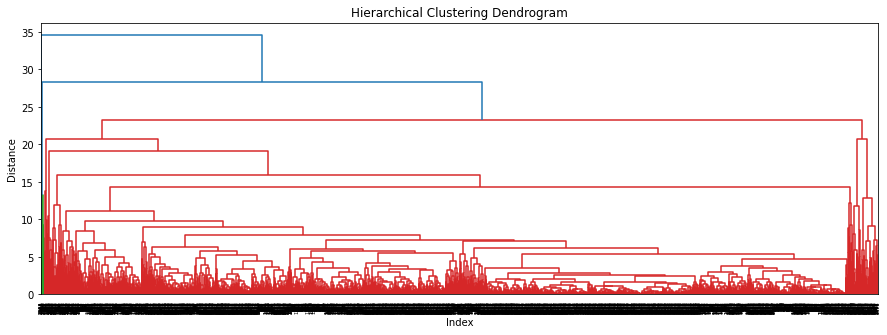

In [32]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(Airlines_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [75]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(Airlines_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Airlines['clust']=cluster_labels # creating a  new column and assigning it to new column 
Airlines 

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  clust  
0         0      1  
1         0      1  
2         0      1  
3         0      1  
4         1      1  
...     ...    ...  
3994      1      1  
3995      1      1  
3996      1      1  
3997      0      1  
3998      0      1  

[3999 rows x 13 columns]

In [35]:
## Airlines Exercise - Kmeans Clustering

In [7]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

In [8]:
Airlines = pd.read_csv("EastWestAirlines.csv")
Airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [9]:
# Column rename.

Airlines= Airlines.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [10]:
Airlines

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 12 columns]

In [11]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [12]:
df_norm = norm_func(Airlines.iloc[:,1:])

In [13]:
df_norm.head(10)  # Top 10 rows

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   
5  0.009631         0.0       0.00        0.0        0.0     0.000000   
6  0.049808         0.0       0.50        0.0        0.0     0.104223   
7  0.012233         0.0       0.00        0.0        0.0     0.019910   
8  0.259850         0.0       0.50        0.5        0.0     0.006648   
9  0.061507         0.0       0.50        0.0        0.0     0.107803   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0     0.011628           0.000000         0.000000           0.843742    0.0  
1     0.023256           0.000000         0.000000           0.839884    0.0  
2     0.046512           0.000000         0.000000           0.847842    0.0  
3     0.011628           0.000000         0.000000           0.837955    0.0  
4     0.302326           0.067398         0.075472           0.835905    1.0  
5     0.000000           0.000000         0.000000           0.836749    0.0  
6     0.290698           0.000000         0.000000           0.843019    0.0  
7     0.046512           0.008112         0.018868           0.836267    1.0  
8     0.500000           0.124931         0.226415           0.837473    1.0  
9     0.325581           0.037317         0.056604           0.835423    1.0

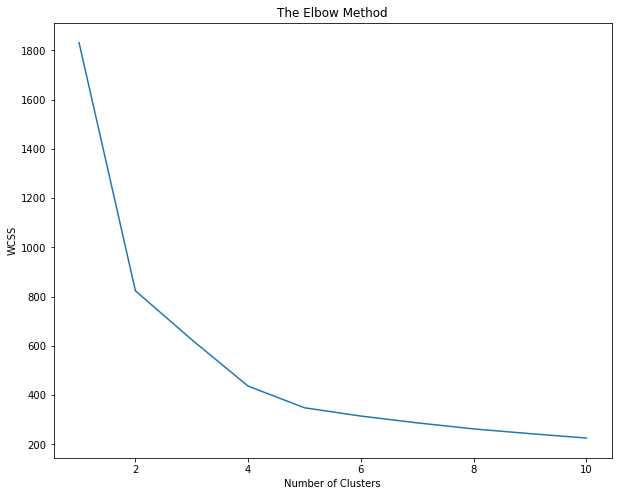

In [14]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [16]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [17]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([1, 1, 1, ..., 0, 4, 4])

In [18]:
df=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Airlines['clust']=df # creating a  new column and assigning it to new column 
Airlines

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  clust  
0         0      1  
1         0      1  
2         0      1  
3         0      1  
4         1      0  
...     ...    ...  
3994      1      2  
3995      1      2  
3996      1      0  
3997      0      4  
3998      0      4  

[3999 rows x 13 columns]

In [19]:
Airlines.iloc[:,1:7].groupby(Airlines.clust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                               
0      108317.387376  198.336634   3.915842   1.001238   1.025990   
1       49921.633641   89.903226   1.122120   1.019585   1.001152   
2       83529.153046  290.453195   1.156018   1.032689   1.008915   
3      118297.325243   73.467638   3.584142   1.001618   1.022654   
4       33097.301357   94.131783   1.070736   1.016473   1.006783   

        Bonus_miles  
clust                
0      45609.657178  
1       3467.074885  
2       8850.395245  
3      31384.393204  
4       3244.520349

Text(0.5, 1.0, 'Clusters using KMeans')

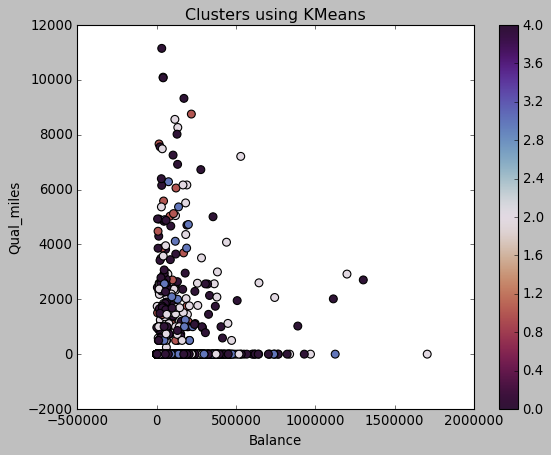

In [44]:
Airlines.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.twilight_shifted_r) 
plt.title('Clusters using KMeans')

In [23]:
clf.inertia_

348.9433217254146

In [24]:
WCSS 

[1830.793212858415,
 823.6756984125229,
 625.1684881570748,
 436.70885761932624,
 348.9433217254147,
 315.2972479815088,
 287.7283332041087,
 263.20075002135775,
 243.92551718928755,
 226.11738800247767]

In [92]:
## Airlines Excercise - DB Scan

In [25]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [26]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("EastWestAirlines.csv");

print(df.head())
df 

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [27]:
# Column rename.

df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [28]:
df

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 12 columns]

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [30]:
df1 = df.drop(['ID'],axis=1) 

In [31]:
array=df1.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [32]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [78]:
dbscan = DBSCAN(eps=0.40, min_samples=12)
dbscan.fit(X) 

DBSCAN(eps=0.4, min_samples=12)

In [79]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [80]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [81]:
cl
pd.set_option("display.max_rows", None)

In [82]:
cl  

cluster
0           0
1           0
2           0
3           0
4          -1
5           0
6          -1
7          -1
8          -1
9          -1
10         -1
11         -1
12         -1
13          0
14          0
15         -1
16         -1
17         -1
18         -1
19         -1
20         -1
21         -1
22         -1
23         -1
24         -1
25          0
26         -1
27          0
28         -1
29         -1
30         -1
31          0
32         -1
33          0
34          0
35         -1
36         -1
37         -1
38         -1
39         -1
40         -1
41         -1
42         -1
43         -1
44         -1
45         -1
46         -1
47         -1
48         -1
49         -1
50         -1
51          0
52         -1
53         -1
54          0
55          0
56         -1
57         -1
58         -1
59         -1
60          3
61         -1
62          0
63         -1
64          0
65         -1
66          0
67         -1
68         -1
69         -1
70         -1
71         -1
72         -1
73         -1
74         -1
75         -1
76         -1
77         -1
78         -1
79         -1
80         -1
81         -1
82          0
83          0
84          0
85         -1
86         -1
87         -1
88         -1
89         -1
90         -1
91         -1
92         -1
93         -1
94         -1
95          0
96         -1
97         -1
98          0
99         -1
100        -1
101         1
102         0
103        -1
104         0
105        -1
106        -1
107         1
108        -1
109        -1
110        -1
111        -1
112        -1
113        -1
114        -1
115        -1
116        -1
117        -1
118        -1
119        -1
120         0
121        -1
122        -1
123        -1
124        -1
125        -1
126        -1
127        -1
128        -1
129        -1
130         1
131        -1
132        -1
133        -1
134        -1
135        -1
136        -1
137        -1
138        -1
139         0
140         0
141         0
142         0
143        -1
144        -1
145        -1
146         0
147        -1
148         3
149         0
150        -1
151        -1
152        -1
153        -1
154        -1
155        -1
156        -1
157        -1
158        -1
159        -1
160        -1
161        -1
162        -1
163        -1
164        -1
165         0
166        -1
167        -1
168        -1
169        -1
170        -1
171         0
172        -1
173        -1
174        -1
175        -1
176        -1
177        -1
178        -1
179        -1
180        -1
181        -1
182         0
183        -1
184        -1
185        -1
186        -1
187        -1
188        -1
189        -1
190        -1
191        -1
192        -1
193        -1
194         1
195        -1
196        -1
197        -1
198        -1
199        -1
200        -1
201        -1
202         0
203        -1
204         0
205        -1
206        -1
207        -1
208        -1
209         0
210        -1
211         0
212        -1
213        -1
214        -1
215        -1
216         0
217         0
218        -1
219        -1
220        -1
221        -1
222        -1
223         0
224        -1
225        -1
226        -1
227        -1
228        -1
229        -1
230        -1
231        -1
232         0
233        -1
234        -1
235        -1
236        -1
237        -1
238        -1
239         0
240        -1
241        -1
242        -1
243        -1
244        -1
245        -1
246        -1
247        -1
248        -1
249        -1
250         0
251        -1
252        -1
253        -1
254        -1
255        -1
256        -1
257        -1
258        -1
259        -1
260        -1
261        -1
262        -1
263        -1
264        -1
265        -1
266         0
267         0
268        -1
269        -1
270        -1
271        -1
272        -1
273        -1
274         0
275        -1
276         0
277        -1
278         0
279        -1
280        -1
281        -1
282        -1
283        -1
284        -1
28

In [83]:
df1 = pd.concat([df,cl],axis=1) 
df1     

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0        

In [84]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

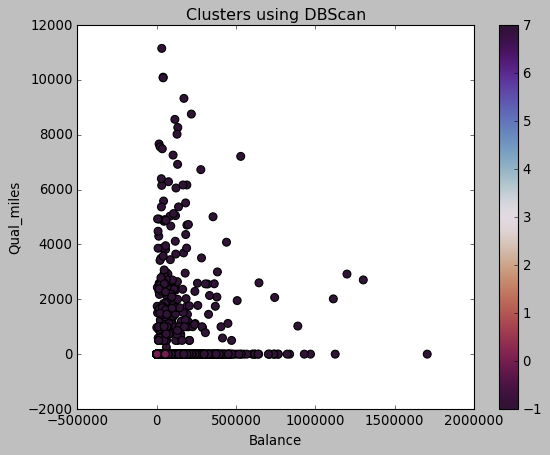

In [85]:
df1.plot(x ="Balance",y ="Qual_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.twilight_shifted_r) 
plt.title('Clusters using DBScan')

In [68]:
dl = dbscan.labels_ 

In [86]:
silhouette_score(X, dl)

0.004558788881675794

In [87]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

In [88]:
y_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [89]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

Kcluster
0            0
1            0
2            0
3            0
4            1
5            0
6            1
7            0
8            2
9            1
10           0
11           1
12           0
13           0
14           0
15           1
16           1
17           0
18           1
19           1
20           1
21           2
22           0
23           0
24           0
25           0
26           0
27           0
28           1
29           0
30           1
31           0
32           1
33           0
34           0
35           1
36           0
37           0
38           1
39           0
40           0
41           1
42           2
43           1
44           1
45           1
46           0
47           0
48           1
49           0
50           2
51           0
52           1
53           0
54           0
55           0
56           1
57           0
58           1
59           1
60           1
61           0
62           0
63           0
64           0
65           2
66           0
67           1
68           1
69           1
70           1
71           1
72           1
73           0
74           1
75           1
76           0
77           1
78           1
79           1
80           0
81           0
82           0
83           0
84           0
85           1
86           0
87           1
88           0
89           0
90           0
91           0
92           1
93           0
94           2
95           0
96           0
97           1
98           0
99           1
100          1
101          0
102          0
103          0
104          0
105          1
106          1
107          0
108          1
109          1
110          1
111          2
112          2
113          0
114          1
115          1
116          0
117          1
118          1
119          0
120          0
121          1
122          1
123          1
124          1
125          1
126          1
127          2
128          1
129          1
130          0
131          0
132          0
133          0
134          1
135          2
136          1
137          1
138          1
139          0
140          0
141          0
142          0
143          1
144          1
145          0
146          0
147          1
148          1
149          0
150          1
151          1
152          1
153          0
154          1
155          1
156          1
157          1
158          1
159          0
160          1
161          1
162          0
163          1
164          1
165          0
166          0
167          1
168          1
169          1
170          1
171          0
172          1
173          1
174          1
175          1
176          1
177          1
178          0
179          0
180          0
181          1
182          0
183          1
184          1
185          1
186          2
187          0
188          1
189          0
190          1
191          2
192          1
193          0
194          0
195          0
196          1
197          1
198          0
199          1
200          1
201          1
202          0
203          1
204          0
205          0
206          1
207          0
208          1
209          0
210          1
211          0
212          0
213          1
214          0
215          1
216          0
217          0
218          1
219          1
220          2
221          1
222          0
223          0
224          1
225          0
226          0
227          1
228          0
229          1
230          1
231          1
232          0
233          0
234          0
235          1
236          0
237          1
238          2
239          0
240          1
241          0
242          1
243          2
244          1
245          2
246          0
247          0
248          1
249          0
250          0
251          0
252          1
253          1
254          0
255          1
256          2
257          1
258          0
259          1
260          0
261          0
262          0
263          0
264          0
265          1
2

In [90]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0        

Text(0.5, 1.0, 'Clusters using KMeans')

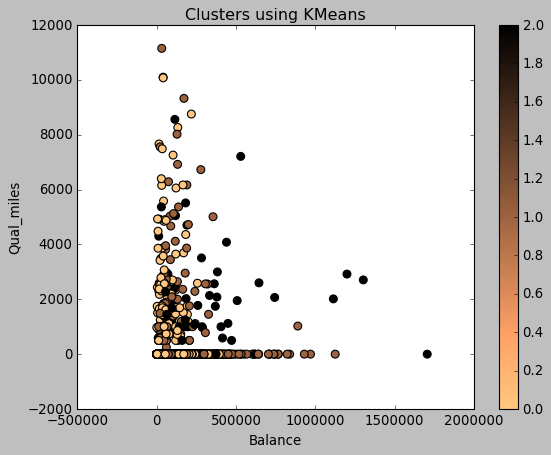

In [91]:
df2.plot(x="Balance",y ="Qual_miles",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 

In [92]:
silhouette_score(X, y_kmeans)

0.3121716765282414

In [38]:
## Crime Data Exercise - Hclustering

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
df = pd.read_csv("crime_data.csv")
df

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [94]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [95]:
df_norm = norm_func(df.iloc[:,1:])
df_norm

Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.114458  0.092466  0.576271  0.196382
23  0.921687  0.732877  0.203390  0.253230
24  0.493976  0.455479  0.644068  0.540052
25  0.313253  0.219178  0.355932  0.235142
26  0.210843  0.195205  0.508475  0.237726
27  0.686747  0.708904  0.830508  1.000000
28  0.078313  0.041096  0.406780  0.056848
29  0.397590  0.390411  0.966102  0.297158
30  0.638554  0.821918  0.644068  0.640827
31  0.620482  0.715753  0.915254  0.485788
32  0.734940  1.000000  0.220339  0.227390
33  0.000000  0.000000  0.203390  0.000000
34  0.391566  0.256849  0.728814  0.364341
35  0.349398  0.363014  0.610169  0.328165
36  0.246988  0.390411  0.593220  0.568475
37  0.331325  0.208904  0.677966  0.196382
38  0.156627  0.441781  0.932203  0.025840
39  0.819277  0.801370  0.271186  0.392765
40  0.180723  0.140411  0.220339  0.142119
41  0.746988  0.489726  0.457627  0.506460
42  0.716867  0.534247  0.813559  0.470284
43  0.144578  0.256849  0.813559  0.403101
44  0.084337  0.010274  0.000000  0.100775
45  0.463855  0.380137  0.525424  0.346253
46  0.192771  0.342466  0.694915  0.488372
47  0.295181  0.123288  0.118644  0.051680
48  0.108434  0.027397  0.576271  0.090439
49  0.361446  0.397260  0.474576  0.214470

In [98]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(df.iloc[:,1:]))
data 

0         1         2         3
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.114458  0.092466  0.576271  0.196382
23  0.921687  0.732877  0.203390  0.253230
24  0.493976  0.455479  0.644068  0.540052
25  0.313253  0.219178  0.355932  0.235142
26  0.210843  0.195205  0.508475  0.237726
27  0.686747  0.708904  0.830508  1.000000
28  0.078313  0.041096  0.406780  0.056848
29  0.397590  0.390411  0.966102  0.297158
30  0.638554  0.821918  0.644068  0.640827
31  0.620482  0.715753  0.915254  0.485788
32  0.734940  1.000000  0.220339  0.227390
33  0.000000  0.000000  0.203390  0.000000
34  0.391566  0.256849  0.728814  0.364341
35  0.349398  0.363014  0.610169  0.328165
36  0.246988  0.390411  0.593220  0.568475
37  0.331325  0.208904  0.677966  0.196382
38  0.156627  0.441781  0.932203  0.025840
39  0.819277  0.801370  0.271186  0.392765
40  0.180723  0.140411  0.220339  0.142119
41  0.746988  0.489726  0.457627  0.506460
42  0.716867  0.534247  0.813559  0.470284
43  0.144578  0.256849  0.813559  0.403101
44  0.084337  0.010274  0.000000  0.100775
45  0.463855  0.380137  0.525424  0.346253
46  0.192771  0.342466  0.694915  0.488372
47  0.295181  0.123288  0.118644  0.051680
48  0.108434  0.027397  0.576271  0.090439
49  0.361446  0.397260  0.474576  0.214470

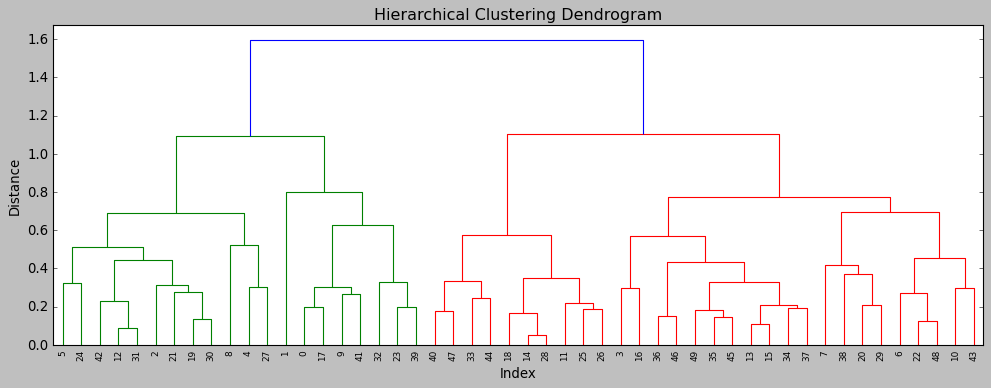

In [99]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [100]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels # creating a  new column and assigning it to new column 
df

Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust
0          Alabama    13.2      236        58  21.2      3
1           Alaska    10.0      263        48  44.5      4
2          Arizona     8.1      294        80  31.0      1
3         Arkansas     8.8      190        50  19.5      0
4       California     9.0      276        91  40.6      1
5         Colorado     7.9      204        78  38.7      1
6      Connecticut     3.3      110        77  11.1      0
7         Delaware     5.9      238        72  15.8      0
8          Florida    15.4      335        80  31.9      1
9          Georgia    17.4      211        60  25.8      3
10          Hawaii     5.3       46        83  20.2      0
11           Idaho     2.6      120        54  14.2      2
12        Illinois    10.4      249        83  24.0      1
13         Indiana     7.2      113        65  21.0      0
14            Iowa     2.2       56        57  11.3      2
15          Kansas     6.0      115        66  18.0      0
16        Kentucky     9.7      109        52  16.3      0
17       Louisiana    15.4      249        66  22.2      3
18           Maine     2.1       83        51   7.8      2
19        Maryland    11.3      300        67  27.8      1
20   Massachusetts     4.4      149        85  16.3      0
21        Michigan    12.1      255        74  35.1      1
22       Minnesota     2.7       72        66  14.9      0
23     Mississippi    16.1      259        44  17.1      3
24        Missouri     9.0      178        70  28.2      1
25         Montana     6.0      109        53  16.4      2
26        Nebraska     4.3      102        62  16.5      2
27          Nevada    12.2      252        81  46.0      1
28   New Hampshire     2.1       57        56   9.5      2
29      New Jersey     7.4      159        89  18.8      0
30      New Mexico    11.4      285        70  32.1      1
31        New York    11.1      254        86  26.1      1
32  North Carolina    13.0      337        45  16.1      3
33    North Dakota     0.8       45        44   7.3      2
34            Ohio     7.3      120        75  21.4      0
35        Oklahoma     6.6      151        68  20.0      0
36          Oregon     4.9      159        67  29.3      0
37    Pennsylvania     6.3      106        72  14.9      0
38    Rhode Island     3.4      174        87   8.3      0
39  South Carolina    14.4      279        48  22.5      3
40    South Dakota     3.8       86        45  12.8      2
41       Tennessee    13.2      188        59  26.9      3
42           Texas    12.7      201        80  25.5      1
43            Utah     3.2      120        80  22.9      0
44         Vermont     2.2       48        32  11.2      2
45        Virginia     8.5      156        63  20.7      0
46      Washington     4.0      145        73  26.2      0
47   West Virginia     5.7       81        39   9.3      2
48       Wisconsin     2.6       53        66  10.8      0
49         Wyoming     6.8      161        60  15.6      0

In [101]:
df.iloc[:,1:].groupby(df.clust).mean()

Murder     Assault   UrbanPop       Rape  clust
clust                                                    
0       5.715000  132.300000  70.800000  18.100000      0
1      10.883333  256.916667  78.333333  32.250000      1
2       3.180000   78.700000  49.300000  11.630000      2
3      14.671429  251.285714  54.285714  21.685714      3
4      10.000000  263.000000  48.000000  44.500000      4

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_subset = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]))
df_subset 

0         1         2         3         4
0   1.255179  0.790787 -0.526195 -0.003451  1.618677
1   0.513019  1.118060 -1.224067  2.509424  2.488933
2   0.072361  1.493817  1.009122  1.053466 -0.121836
3   0.234708  0.233212 -1.084492 -0.186794 -0.992092
4   0.281093  1.275635  1.776781  2.088814 -0.121836
5   0.025976  0.402909  0.869548  1.883901 -0.121836
6  -1.040880 -0.736484  0.799761 -1.092723 -0.992092
7  -0.437875  0.815030  0.450825 -0.585834 -0.992092
8   1.765415  1.990786  1.009122  1.150530 -0.121836
9   2.229265  0.487757 -0.386621  0.492653  1.618677
10 -0.577030 -1.512241  1.218484 -0.111300 -0.992092
11 -1.203228 -0.615272 -0.805344 -0.758392  0.748421
12  0.605789  0.948363  1.218484  0.298525 -0.121836
13 -0.136372 -0.700121 -0.037685 -0.025021 -0.992092
14 -1.295998 -1.391029 -0.595982 -1.071153  0.748421
15 -0.414682 -0.675878  0.032102 -0.348567 -0.992092
16  0.443441 -0.748605 -0.944918 -0.531910 -0.992092
17  1.765415  0.948363  0.032102  0.104398  1.618677
18 -1.319191 -1.063757 -1.014705 -1.448624  0.748421
19  0.814521  1.566544  0.101889  0.708350 -0.121836
20 -0.785763 -0.263757  1.358058 -0.531910 -0.992092
21  1.000062  1.021090  0.590399  1.495646 -0.121836
22 -1.180036 -1.197090  0.032102 -0.682898 -0.992092
23  1.927762  1.069575 -1.503215 -0.445631  1.618677
24  0.281093  0.087757  0.311251  0.751490 -0.121836
25 -0.414682 -0.748605 -0.875131 -0.521125  0.748421
26 -0.808955 -0.833454 -0.247047 -0.510340  0.748421
27  1.023254  0.984726  1.078909  2.671197 -0.121836
28 -1.319191 -1.378908 -0.665769 -1.265281  0.748421
29 -0.089987 -0.142545  1.637207 -0.262288 -0.992092
30  0.837714  1.384726  0.311251  1.172100 -0.121836
31  0.768136  1.008969  1.427845  0.525008 -0.121836
32  1.208794  2.015028 -1.433428 -0.553480  1.618677
33 -1.620693 -1.524362 -1.503215 -1.502548  0.748421
34 -0.113180 -0.615272  0.660186  0.018119 -0.992092
35 -0.275527 -0.239515  0.171676 -0.132870 -0.992092
36 -0.669800 -0.142545  0.101889  0.870123 -0.992092
37 -0.345105 -0.784969  0.450825 -0.682898 -0.992092
38 -1.017688  0.039273  1.497632 -1.394700 -0.992092
39  1.533490  1.311999 -1.224067  0.136752  1.618677
40 -0.924918 -1.027393 -1.433428 -0.909380  0.748421
41  1.255179  0.208970 -0.456408  0.611287  1.618677
42  1.139217  0.366545  1.009122  0.460298 -0.121836
43 -1.064073 -0.615272  1.009122  0.179892 -0.992092
44 -1.295998 -1.487999 -2.340661 -1.081938  0.748421
45  0.165131 -0.178909 -0.177259 -0.057376 -0.992092
46 -0.878533 -0.312242  0.520612  0.535792 -0.992092
47 -0.484260 -1.087999 -1.852151 -1.286851  0.748421
48 -1.203228 -1.427393  0.032102 -1.125078 -0.992092
49 -0.229142 -0.118303 -0.386621 -0.607404 -0.992092

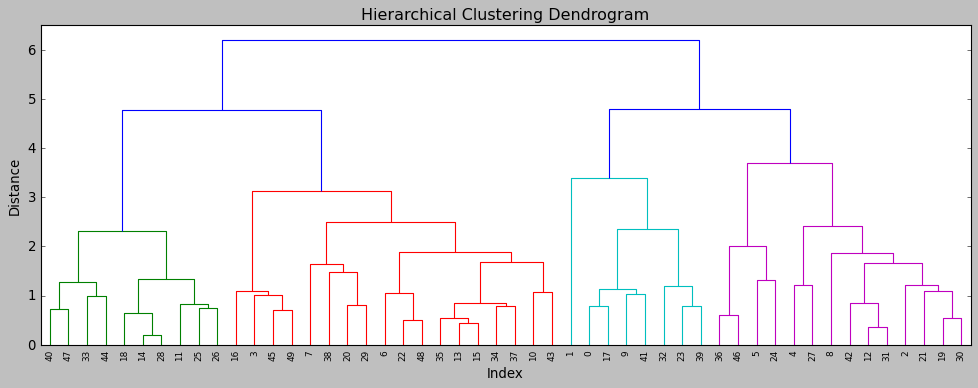

In [103]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [104]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels # creating a  new column and assigning it to new column 
df 

Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust
0          Alabama    13.2      236        58  21.2      0
1           Alaska    10.0      263        48  44.5      0
2          Arizona     8.1      294        80  31.0      2
3         Arkansas     8.8      190        50  19.5      1
4       California     9.0      276        91  40.6      2
5         Colorado     7.9      204        78  38.7      4
6      Connecticut     3.3      110        77  11.1      1
7         Delaware     5.9      238        72  15.8      1
8          Florida    15.4      335        80  31.9      2
9          Georgia    17.4      211        60  25.8      0
10          Hawaii     5.3       46        83  20.2      1
11           Idaho     2.6      120        54  14.2      3
12        Illinois    10.4      249        83  24.0      2
13         Indiana     7.2      113        65  21.0      1
14            Iowa     2.2       56        57  11.3      3
15          Kansas     6.0      115        66  18.0      1
16        Kentucky     9.7      109        52  16.3      1
17       Louisiana    15.4      249        66  22.2      0
18           Maine     2.1       83        51   7.8      3
19        Maryland    11.3      300        67  27.8      2
20   Massachusetts     4.4      149        85  16.3      1
21        Michigan    12.1      255        74  35.1      2
22       Minnesota     2.7       72        66  14.9      1
23     Mississippi    16.1      259        44  17.1      0
24        Missouri     9.0      178        70  28.2      4
25         Montana     6.0      109        53  16.4      3
26        Nebraska     4.3      102        62  16.5      3
27          Nevada    12.2      252        81  46.0      2
28   New Hampshire     2.1       57        56   9.5      3
29      New Jersey     7.4      159        89  18.8      1
30      New Mexico    11.4      285        70  32.1      2
31        New York    11.1      254        86  26.1      2
32  North Carolina    13.0      337        45  16.1      0
33    North Dakota     0.8       45        44   7.3      3
34            Ohio     7.3      120        75  21.4      1
35        Oklahoma     6.6      151        68  20.0      1
36          Oregon     4.9      159        67  29.3      4
37    Pennsylvania     6.3      106        72  14.9      1
38    Rhode Island     3.4      174        87   8.3      1
39  South Carolina    14.4      279        48  22.5      0
40    South Dakota     3.8       86        45  12.8      3
41       Tennessee    13.2      188        59  26.9      0
42           Texas    12.7      201        80  25.5      2
43            Utah     3.2      120        80  22.9      1
44         Vermont     2.2       48        32  11.2      3
45        Virginia     8.5      156        63  20.7      1
46      Washington     4.0      145        73  26.2      4
47   West Virginia     5.7       81        39   9.3      3
48       Wisconsin     2.6       53        66  10.8      1
49         Wyoming     6.8      161        60  15.6      1

In [54]:
## Crime Data Exercise - Kmeans clustering

In [105]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

In [106]:
df = pd.read_csv("crime_data.csv")
df

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [107]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [108]:
df_norm = norm_func(df.iloc[:,1:])

In [109]:
df_norm.head(10)  # Top 10 rows

Murder   Assault  UrbanPop      Rape
0  0.746988  0.654110  0.440678  0.359173
1  0.554217  0.746575  0.271186  0.961240
2  0.439759  0.852740  0.813559  0.612403
3  0.481928  0.496575  0.305085  0.315245
4  0.493976  0.791096  1.000000  0.860465
5  0.427711  0.544521  0.779661  0.811370
6  0.150602  0.222603  0.762712  0.098191
7  0.307229  0.660959  0.677966  0.219638
8  0.879518  0.993151  0.813559  0.635659
9  1.000000  0.568493  0.474576  0.478036

C:\Users\anbuc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


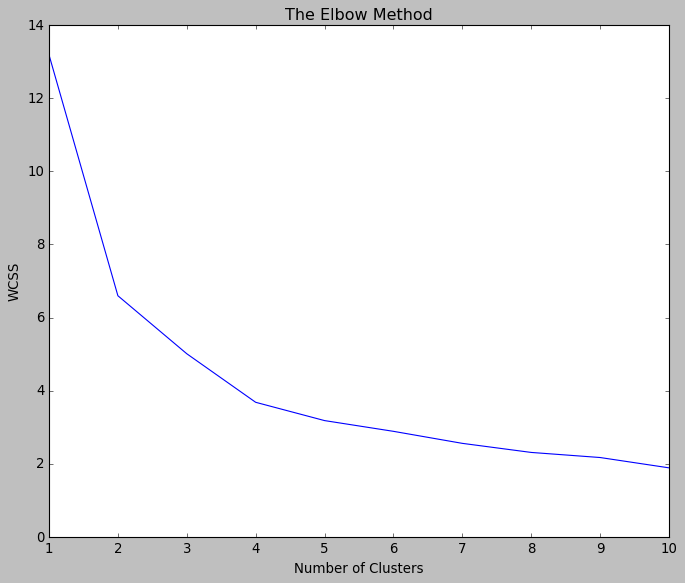

In [110]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [111]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [112]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([1, 2, 2, 4, 2, 2, 0, 4, 2, 1, 0, 3, 2, 4, 3, 4, 4, 1, 3, 2, 0, 2,
       3, 1, 4, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 4, 4, 0, 0, 1, 3, 1, 2, 0,
       3, 4, 0, 3, 3, 4])

In [113]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
df['clust']=md # creating a  new column and assigning it to new column 
df

Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust
0          Alabama    13.2      236        58  21.2      1
1           Alaska    10.0      263        48  44.5      2
2          Arizona     8.1      294        80  31.0      2
3         Arkansas     8.8      190        50  19.5      4
4       California     9.0      276        91  40.6      2
5         Colorado     7.9      204        78  38.7      2
6      Connecticut     3.3      110        77  11.1      0
7         Delaware     5.9      238        72  15.8      4
8          Florida    15.4      335        80  31.9      2
9          Georgia    17.4      211        60  25.8      1
10          Hawaii     5.3       46        83  20.2      0
11           Idaho     2.6      120        54  14.2      3
12        Illinois    10.4      249        83  24.0      2
13         Indiana     7.2      113        65  21.0      4
14            Iowa     2.2       56        57  11.3      3
15          Kansas     6.0      115        66  18.0      4
16        Kentucky     9.7      109        52  16.3      4
17       Louisiana    15.4      249        66  22.2      1
18           Maine     2.1       83        51   7.8      3
19        Maryland    11.3      300        67  27.8      2
20   Massachusetts     4.4      149        85  16.3      0
21        Michigan    12.1      255        74  35.1      2
22       Minnesota     2.7       72        66  14.9      3
23     Mississippi    16.1      259        44  17.1      1
24        Missouri     9.0      178        70  28.2      4
25         Montana     6.0      109        53  16.4      3
26        Nebraska     4.3      102        62  16.5      3
27          Nevada    12.2      252        81  46.0      2
28   New Hampshire     2.1       57        56   9.5      3
29      New Jersey     7.4      159        89  18.8      0
30      New Mexico    11.4      285        70  32.1      2
31        New York    11.1      254        86  26.1      2
32  North Carolina    13.0      337        45  16.1      1
33    North Dakota     0.8       45        44   7.3      3
34            Ohio     7.3      120        75  21.4      0
35        Oklahoma     6.6      151        68  20.0      4
36          Oregon     4.9      159        67  29.3      4
37    Pennsylvania     6.3      106        72  14.9      0
38    Rhode Island     3.4      174        87   8.3      0
39  South Carolina    14.4      279        48  22.5      1
40    South Dakota     3.8       86        45  12.8      3
41       Tennessee    13.2      188        59  26.9      1
42           Texas    12.7      201        80  25.5      2
43            Utah     3.2      120        80  22.9      0
44         Vermont     2.2       48        32  11.2      3
45        Virginia     8.5      156        63  20.7      4
46      Washington     4.0      145        73  26.2      0
47   West Virginia     5.7       81        39   9.3      3
48       Wisconsin     2.6       53        66  10.8      3
49         Wyoming     6.8      161        60  15.6      4

In [114]:
df.iloc[:,1:7].groupby(df.clust).mean()

Murder     Assault   UrbanPop       Rape  clust
clust                                                    
0       4.955556  125.444444  80.111111  17.788889      0
1      14.671429  251.285714  54.285714  21.685714      1
2      10.966667  264.000000  76.500000  33.608333      2
3       3.091667   76.000000  52.083333  11.833333      3
4       7.340000  157.000000  63.300000  20.440000      4

Text(0.5, 1.0, 'Clusters using KMeans')

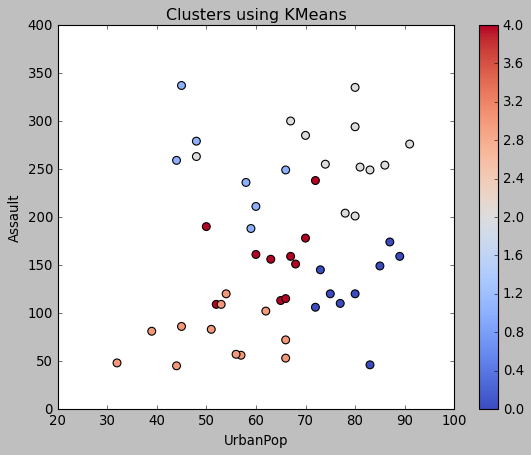

In [117]:
df.plot(x="UrbanPop",y ="Assault",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

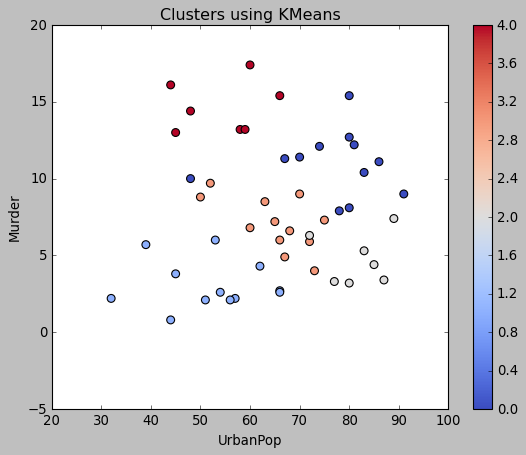

In [72]:
df.plot(x="UrbanPop",y ="Murder",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

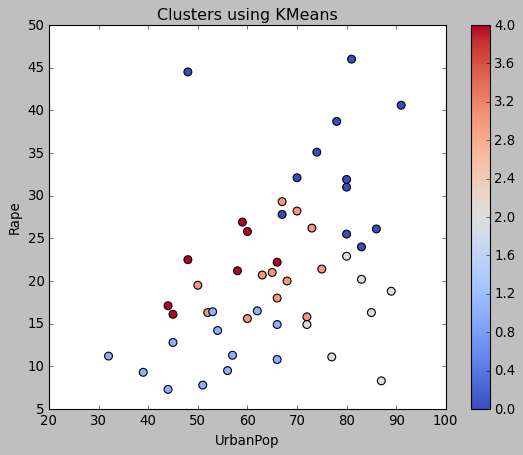

In [73]:
df.plot(x="UrbanPop",y ="Rape",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [118]:
clf.inertia_

3.1842618139677223

In [119]:
WCSS

[13.184122550256445,
 6.596893867946199,
 5.010878493006419,
 3.683456153585915,
 3.183157731676654,
 2.8894270280108656,
 2.5605629029591555,
 2.3124192369994487,
 2.1732259089428845,
 1.8910168550362565]

In [76]:
## Crime Data Exercise - DBscan

In [120]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [121]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("crime_data.csv");

print(df.head())
df 

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [122]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [123]:
df1 = df.drop(['Unnamed: 0'],axis=1) 

In [124]:
array=df1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [125]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [201]:
dbscan = DBSCAN(eps=0.80, min_samples=5)
dbscan.fit(X)   

DBSCAN(eps=0.8)

In [202]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [203]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [204]:
cl
pd.set_option("display.max_rows", None)

In [205]:
cl 

cluster
0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11        0
12       -1
13        0
14        1
15        0
16       -1
17       -1
18        1
19       -1
20       -1
21       -1
22        0
23       -1
24       -1
25        0
26        0
27       -1
28        1
29       -1
30       -1
31       -1
32       -1
33        1
34        0
35        0
36       -1
37        0
38       -1
39       -1
40        1
41       -1
42       -1
43       -1
44       -1
45        0
46       -1
47       -1
48        1
49        0

In [206]:
df1 = pd.concat([df,cl],axis=1) 
df1 

Unnamed: 0  Murder  Assault  UrbanPop  Rape  cluster
0          Alabama    13.2      236        58  21.2       -1
1           Alaska    10.0      263        48  44.5       -1
2          Arizona     8.1      294        80  31.0       -1
3         Arkansas     8.8      190        50  19.5       -1
4       California     9.0      276        91  40.6       -1
5         Colorado     7.9      204        78  38.7       -1
6      Connecticut     3.3      110        77  11.1       -1
7         Delaware     5.9      238        72  15.8       -1
8          Florida    15.4      335        80  31.9       -1
9          Georgia    17.4      211        60  25.8       -1
10          Hawaii     5.3       46        83  20.2       -1
11           Idaho     2.6      120        54  14.2        0
12        Illinois    10.4      249        83  24.0       -1
13         Indiana     7.2      113        65  21.0        0
14            Iowa     2.2       56        57  11.3        1
15          Kansas     6.0      115        66  18.0        0
16        Kentucky     9.7      109        52  16.3       -1
17       Louisiana    15.4      249        66  22.2       -1
18           Maine     2.1       83        51   7.8        1
19        Maryland    11.3      300        67  27.8       -1
20   Massachusetts     4.4      149        85  16.3       -1
21        Michigan    12.1      255        74  35.1       -1
22       Minnesota     2.7       72        66  14.9        0
23     Mississippi    16.1      259        44  17.1       -1
24        Missouri     9.0      178        70  28.2       -1
25         Montana     6.0      109        53  16.4        0
26        Nebraska     4.3      102        62  16.5        0
27          Nevada    12.2      252        81  46.0       -1
28   New Hampshire     2.1       57        56   9.5        1
29      New Jersey     7.4      159        89  18.8       -1
30      New Mexico    11.4      285        70  32.1       -1
31        New York    11.1      254        86  26.1       -1
32  North Carolina    13.0      337        45  16.1       -1
33    North Dakota     0.8       45        44   7.3        1
34            Ohio     7.3      120        75  21.4        0
35        Oklahoma     6.6      151        68  20.0        0
36          Oregon     4.9      159        67  29.3       -1
37    Pennsylvania     6.3      106        72  14.9        0
38    Rhode Island     3.4      174        87   8.3       -1
39  South Carolina    14.4      279        48  22.5       -1
40    South Dakota     3.8       86        45  12.8        1
41       Tennessee    13.2      188        59  26.9       -1
42           Texas    12.7      201        80  25.5       -1
43            Utah     3.2      120        80  22.9       -1
44         Vermont     2.2       48        32  11.2       -1
45        Virginia     8.5      156        63  20.7        0
46      Washington     4.0      145        73  26.2       -1
47   West Virginia     5.7       81        39   9.3       -1
48       Wisconsin     2.6       53        66  10.8        1
49         Wyoming     6.8      161        60  15.6        0

In [207]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

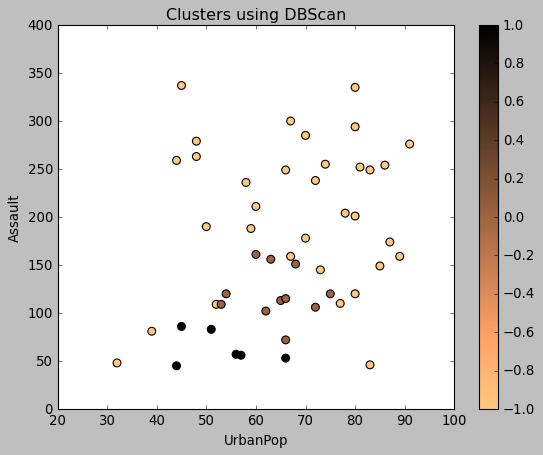

In [208]:
df1.plot(x="UrbanPop",y ="Assault",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')  

Text(0.5, 1.0, 'Clusters using DBScan')

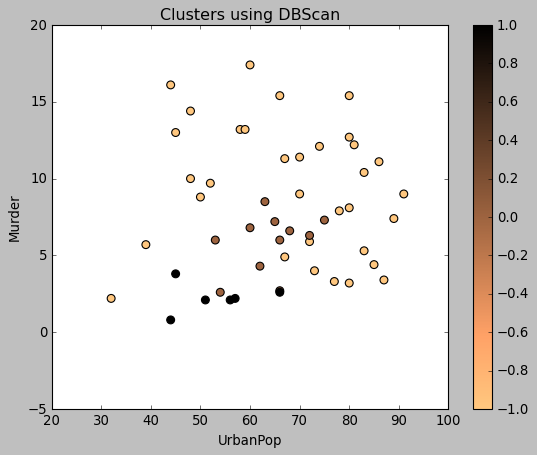

In [209]:
df1.plot(x="UrbanPop",y ="Murder",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

Text(0.5, 1.0, 'Clusters using DBScan')

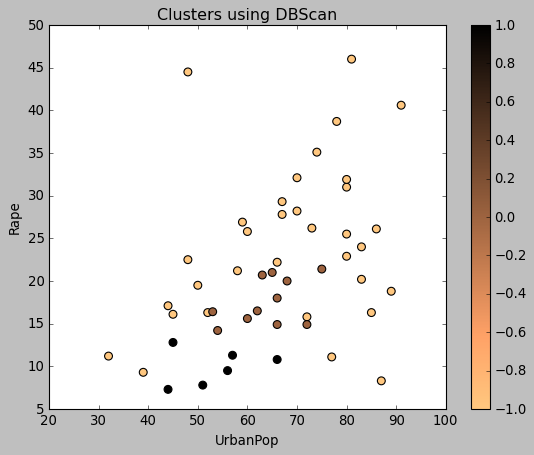

In [210]:
df1.plot(x="UrbanPop",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [211]:
dl = dbscan.labels_ 

In [212]:
sklearn = "sklearn.metrics.silhouette_score(X,dl)"
silhouette_score(X, dl)

0.0737221532804094

In [213]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

In [214]:
y_kmeans

array([2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 0])

In [215]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

Kcluster
0          2
1          2
2          2
3          0
4          2
5          2
6          0
7          0
8          2
9          2
10         0
11         1
12         2
13         0
14         1
15         0
16         1
17         2
18         1
19         2
20         0
21         2
22         1
23         2
24         2
25         1
26         1
27         2
28         1
29         0
30         2
31         2
32         2
33         1
34         0
35         0
36         0
37         0
38         0
39         2
40         1
41         2
42         2
43         0
44         1
45         0
46         0
47         1
48         1
49         0

In [216]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

Unnamed: 0  Murder  Assault  UrbanPop  Rape  cluster  Kcluster
0          Alabama    13.2      236        58  21.2       -1         2
1           Alaska    10.0      263        48  44.5       -1         2
2          Arizona     8.1      294        80  31.0       -1         2
3         Arkansas     8.8      190        50  19.5       -1         0
4       California     9.0      276        91  40.6       -1         2
5         Colorado     7.9      204        78  38.7       -1         2
6      Connecticut     3.3      110        77  11.1       -1         0
7         Delaware     5.9      238        72  15.8       -1         0
8          Florida    15.4      335        80  31.9       -1         2
9          Georgia    17.4      211        60  25.8       -1         2
10          Hawaii     5.3       46        83  20.2       -1         0
11           Idaho     2.6      120        54  14.2        0         1
12        Illinois    10.4      249        83  24.0       -1         2
13         Indiana     7.2      113        65  21.0        0         0
14            Iowa     2.2       56        57  11.3        1         1
15          Kansas     6.0      115        66  18.0        0         0
16        Kentucky     9.7      109        52  16.3       -1         1
17       Louisiana    15.4      249        66  22.2       -1         2
18           Maine     2.1       83        51   7.8        1         1
19        Maryland    11.3      300        67  27.8       -1         2
20   Massachusetts     4.4      149        85  16.3       -1         0
21        Michigan    12.1      255        74  35.1       -1         2
22       Minnesota     2.7       72        66  14.9        0         1
23     Mississippi    16.1      259        44  17.1       -1         2
24        Missouri     9.0      178        70  28.2       -1         2
25         Montana     6.0      109        53  16.4        0         1
26        Nebraska     4.3      102        62  16.5        0         1
27          Nevada    12.2      252        81  46.0       -1         2
28   New Hampshire     2.1       57        56   9.5        1         1
29      New Jersey     7.4      159        89  18.8       -1         0
30      New Mexico    11.4      285        70  32.1       -1         2
31        New York    11.1      254        86  26.1       -1         2
32  North Carolina    13.0      337        45  16.1       -1         2
33    North Dakota     0.8       45        44   7.3        1         1
34            Ohio     7.3      120        75  21.4        0         0
35        Oklahoma     6.6      151        68  20.0        0         0
36          Oregon     4.9      159        67  29.3       -1         0
37    Pennsylvania     6.3      106        72  14.9        0         0
38    Rhode Island     3.4      174        87   8.3       -1         0
39  South Carolina    14.4      279        48  22.5       -1         2
40    South Dakota     3.8       86        45  12.8        1         1
41       Tennessee    13.2      188        59  26.9       -1         2
42           Texas    12.7      201        80  25.5       -1         2
43            Utah     3.2      120        80  22.9       -1         0
44         Vermont     2.2       48        32  11.2       -1         1
45        Virginia     8.5      156        63  20.7        0         0
46      Washington     4.0      145        73  26.2       -1         0
47   West Virginia     5.7       81        39   9.3       -1         1
48       Wisconsin     2.6       53        66  10.8        1         1
49         Wyoming     6.8      161        60  15.6        0         0

Text(0.5, 1.0, 'Clusters using KMeans')

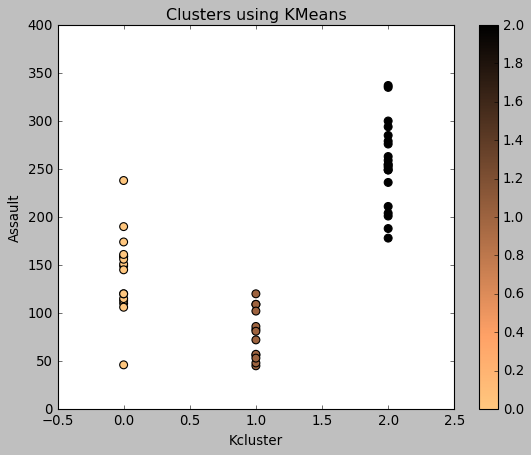

In [217]:
df2.plot(x="Kcluster",y ="Assault",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')  

Text(0.5, 1.0, 'Clusters using KMeans')

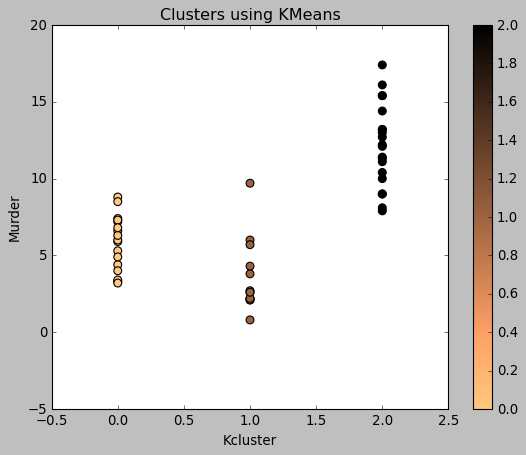

In [218]:
df2.plot(x="Kcluster",y ="Murder",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')  

Text(0.5, 1.0, 'Clusters using KMeans')

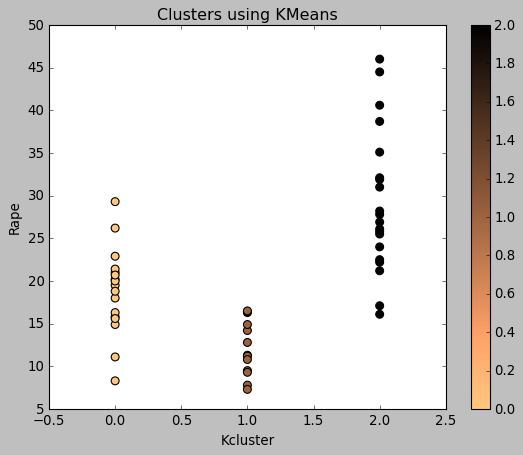

In [219]:
df2.plot(x="Kcluster",y ="Rape",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')  

In [220]:
silhouette_score(X, y_kmeans)

0.3094312474241775